In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
vanilla_data = pd.read_csv('vanilla_inference.csv', header=None, names=['target_model', 'speed', 'acc_rate'])
sd_data = pd.read_csv('sd_inference.csv', header=None, names=['draft_model', 'target_model', 'speed', 'acc_rate'])
mcsd_data = pd.read_csv('mcsd_inference.csv', header=None, names=['draft_model', 'target_model', 'speed', 'acc_rate'])
dynasd_data = pd.read_csv('dynasd_inference.csv', header=None, names=['draft_model', 'target_model', 'speed', 'acc_rate'])

FileNotFoundError: [Errno 2] No such file or directory: 'vanilla_inference.csv'

In [52]:
sd_data = sd_data.merge(vanilla_data, on='target_model', suffixes=('', '_vanilla'))
mcsd_data = mcsd_data.merge(vanilla_data, on='target_model', suffixes=('', '_vanilla'))
dynasd_data = dynasd_data.merge(vanilla_data, on='target_model', suffixes=('', '_vanilla'))

sd_data['speedup'] = sd_data['speed'] / sd_data['speed_vanilla']
mcsd_data['speedup'] = mcsd_data['speed'] / mcsd_data['speed_vanilla']
dynasd_data['speedup'] = dynasd_data['speed'] / dynasd_data['speed_vanilla']

In [53]:
print(dynasd_data)

                          draft_model                   target_model  \
0  TinyLlama/TinyLlama-1.1B-Chat-v1.0           lmsys/vicuna-7b-v1.5   
1                  JackFram/llama-68m           lmsys/vicuna-7b-v1.5   
2  TinyLlama/TinyLlama-1.1B-Chat-v1.0  meta-llama/Llama-2-7b-chat-hf   
3                  JackFram/llama-68m  meta-llama/Llama-2-7b-chat-hf   

        speed  speed_vanilla   speedup  
0   81.499772      57.661159  1.413426  
1  152.951370      57.661159  2.652589  
2   80.509155      58.020447  1.387600  
3  130.983944      58.020447  2.257548  


In [54]:
model_short_names = {
    'TinyLlama/TinyLlama-1.1B-Chat-v1.0': 'TinyLlama 1.1B',
    'lmsys/vicuna-7b-v1.5': 'Vicuna 7B',
    'meta-llama/Llama-2-7b-chat-hf': 'Llama 2 7B',
    'JackFram/llama-68m': 'Llama 68M',
}

sd_data.replace({'draft_model': model_short_names, 'target_model': model_short_names}, inplace=True)
mcsd_data.replace({'draft_model': model_short_names, 'target_model': model_short_names}, inplace=True)
dynasd_data.replace({'draft_model': model_short_names, 'target_model': model_short_names}, inplace=True)

In [55]:
combined_data = pd.concat([
    sd_data[['draft_model', 'target_model', 'speedup']].assign(method='SD'),
    mcsd_data[['draft_model', 'target_model', 'speedup']].assign(method='MCSD'),
    dynasd_data[['draft_model', 'target_model', 'speedup']].assign(method='DynaSD')
])
print(combined_data)

      draft_model target_model   speedup  method
0  TinyLlama 1.1B    Vicuna 7B  1.036887      SD
1       Llama 68M    Vicuna 7B  1.432707      SD
2  TinyLlama 1.1B   Llama 2 7B  0.990009      SD
3       Llama 68M   Llama 2 7B  1.362322      SD
0  TinyLlama 1.1B    Vicuna 7B  1.174094    MCSD
1       Llama 68M    Vicuna 7B  1.719386    MCSD
2  TinyLlama 1.1B   Llama 2 7B  1.117441    MCSD
3       Llama 68M   Llama 2 7B  1.637227    MCSD
0  TinyLlama 1.1B    Vicuna 7B  1.413426  DynaSD
1       Llama 68M    Vicuna 7B  2.652589  DynaSD
2  TinyLlama 1.1B   Llama 2 7B  1.387600  DynaSD
3       Llama 68M   Llama 2 7B  2.257548  DynaSD


['TinyLlama 1.1B+Vicuna 7B' 'Llama 68M+Vicuna 7B'
 'TinyLlama 1.1B+Llama 2 7B' 'Llama 68M+Llama 2 7B']


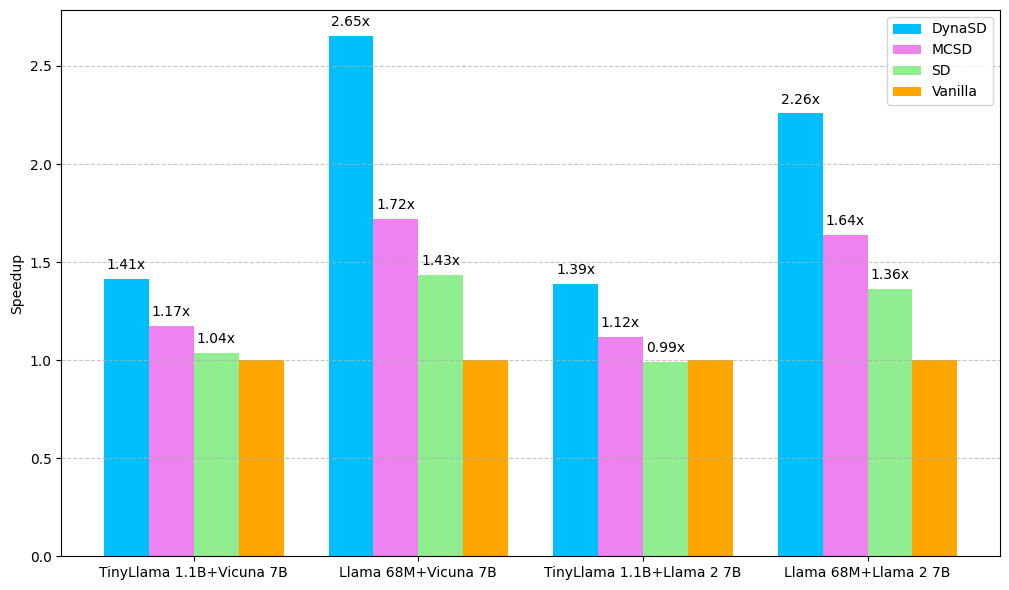

In [56]:
combined_data['label'] = combined_data['draft_model'] + '+' + combined_data['target_model']
labels = combined_data['label'].unique()
print(labels)

x = range(len(labels))

plt.figure(figsize=(12, 6))

width = 0.2

plt.bar(x, combined_data[combined_data['method'] == 'DynaSD']['speedup'], 
        width=width, label='DynaSD', color='deepskyblue', align='center')
plt.bar([p + width for p in x], combined_data[combined_data['method'] == 'MCSD']['speedup'], 
        width=width, label='MCSD', color='violet', align='center')
plt.bar([p + 2*width for p in x], combined_data[combined_data['method'] == 'SD']['speedup'], 
        width=width, label='SD', color='lightgreen', align='center')

# Plotting vanilla speed as baseline (all 1x)
plt.bar([p + 3*width for p in x], [1]*len(x), width=width, label='Vanilla', color='orange', align='center')

# Adding labels and title
plt.ylabel('Speedup')

# Setting x-ticks with horizontal alignment
plt.xticks([p + 1.5*width for p in x], labels, rotation=0, ha='center', fontsize=10)

# Adding gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend to the top right
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Displaying speedup ratios on top of the bars
for i, v in enumerate(combined_data[combined_data['method'] == 'DynaSD']['speedup']):
    plt.text(i, v + 0.05, f"{v:.2f}x", color='black', ha='center', fontsize=10)

for i, v in enumerate(combined_data[combined_data['method'] == 'MCSD']['speedup']):
    plt.text(i + width, v + 0.05, f"{v:.2f}x", color='black', ha='center', fontsize=10)

for i, v in enumerate(combined_data[combined_data['method'] == 'SD']['speedup']):
    plt.text(i + 2*width, v + 0.05, f"{v:.2f}x", color='black', ha='center', fontsize=10)

# Adjust layout to ensure everything fits well
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()